In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import os
import sys
#path
sys.path.insert(0,os.path.join("/net/theorie/auto/scratch/amber.klimke/Programs/SherpaResummerPlugin/Scripts"))
sys.path.insert(0,os.path.join("/home/amber.klimke/Documents/Masterarbeit/master"))
sys.path.insert(0,os.path.join("/home/amber.klimke/Documents/Masterarbeit/Zqq_3j/MC/FO"))

In [3]:
import Resum.Sigma as resum
import Resum.utils as rutils
import Resum.MatchingSchemes as match
Multiplicative = match.Multiplicative
Additive = match.Additive
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
#import yoda
#from Resum.yoda_utils import *
import math as m
import random as r

In [4]:
%load_ext autoreload
%autoreload 2
import difflib
import pandas as pnd
#import yoda

In [23]:
filesBB =  {'NLL':rutils.ReadFile('Sherpa_results/test_resum1104/NLLFC1.dat.gz'),
    'LO':rutils.ReadFile('Sherpa_results/test_resum1104/LOFC1_RS.dat.gz')
           }

variations = [[[],['CENTRAL']],
              #[["xL=0.5"],['CENTRAL']],
              #[["xL=2"],['CENTRAL']],
             # [[],['MUR=0.5__MUF=1__LHAPDF=-1']],
             # [[],['MUR=2__MUF=1__LHAPDF=-1']],
              
             ]
#dists = resum.CumulantObservableDict(['BL','CL','ML','TL','WL','F0','F1','F2','F3'],filesBB,variations,
dists = resum.CumulantObservableDict(['TL','FC1','FC2','FC3'],filesBB,variations,
                                       transformX=lambda x: np.log(x))
#dists.update(resum.CumulantObservableDict(['Y3'],filesBB,variations,rebin=4))

fullnames = {'BL': 'TotBroad',
             'CL': 'CParameter',
             'ML': 'HeavyJetMass',
             'TL': 'Thrust',
             'WL': 'WideBroad',
             'Y3': 'Y3_Durham',
             'FC1': 'FractionalEnergyCorrelation',
             'FC2': 'FractionalEnergyCorrelation2',
             'FC3': 'FractionalEnergyCorrelation3'
            }


b_values={"TL": 1, 'FC1': 0.5,'FC2':0,'FC3':-0.5}
files =  {'NLL':rutils.ReadFile('Sherpa_results/test_resum1104/NLLFC1.dat.gz')}

variations = [[[],['CENTRAL']],
              #[["xL=0.5"],['CENTRAL']],
              #[["xL=2"],['CENTRAL']],
             # [[],['MUR=0.5__MUF=1__LHAPDF=-1']],
             # [[],['MUR=2__MUF=1__LHAPDF=-1']],
              
             ]
dists1 = resum.CumulantObservableDict(['TL','FC1','FC2','FC3'],files,variations,
                                       transformX=lambda x:np.log(x),rebin=2)
CF = 4/3
CA = 3
nf = 5
beta0 = (11-2/3*nf)/2

for O in dists1:
    print(O)
    O2=O
    if O=="TL":
          O2="T"
    try:
        lo = np.loadtxt(f'Zqq_3j/MC/FO/zqq_3j/E0000.y1d8.iL0.Log{O2}.dat').T[2] # hier für Zqq und deine Observablen anpassen
        nlo = np.loadtxt(f'Zqq_3j/MC/FO/zqq_3j/E0000.y1d8.iN0.Log{O2}.dat').T[2]
        for var in dists1[O]:
            s1=2*0.75*CF # Prozess spezifisch,         das ist der richtige Wert für Zqq
            dists1[O][var].addLOArray(lo,s1,multSigma0=True,multAsBar=True)
            dists1[O][var].addNLOArray(nlo,lo,multSigma0=True,multAsBar=True)
    except ValueError:
        print('impossible')



def d(x):
    return x[1:]-x[:len(x)-1]

def rescale(array,offset=0):
    arr2=(array-np.min(array))
    return arr2/np.max(arr2[offset:]), np.max(arr2[offset:])


import resummation_class as my_rs
print(dists1[O]["CENTRAL"].sigma0)
print(dists[O]["CENTRAL"].sigma0)

TL
FC1
FC2
FC3
40460.3
40460.3


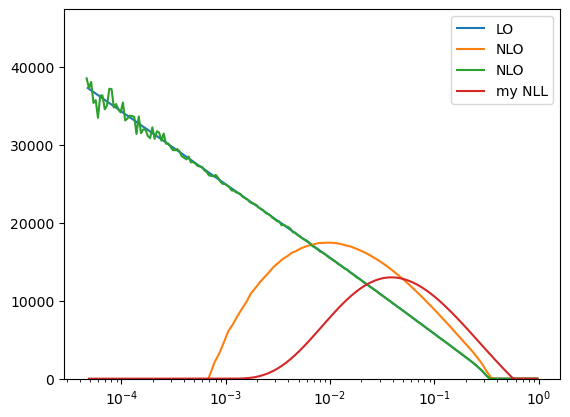

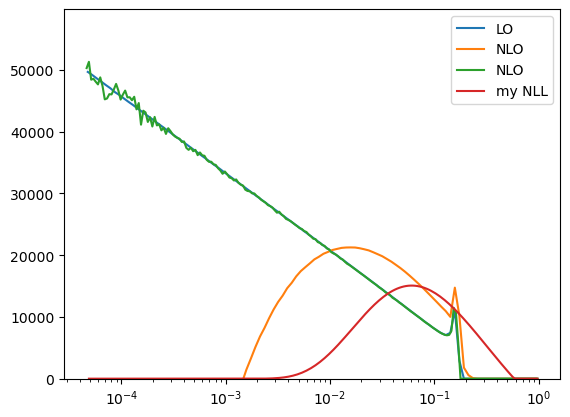

/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:110: RuntimeWarning: overflow encountered in exp
  result=np.exp(-R*np.euler_gamma)/gamma(1+R)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:110: RuntimeWarning: divide by zero encountered in divide
  result=np.exp(-R*np.euler_gamma)/gamma(1+R)


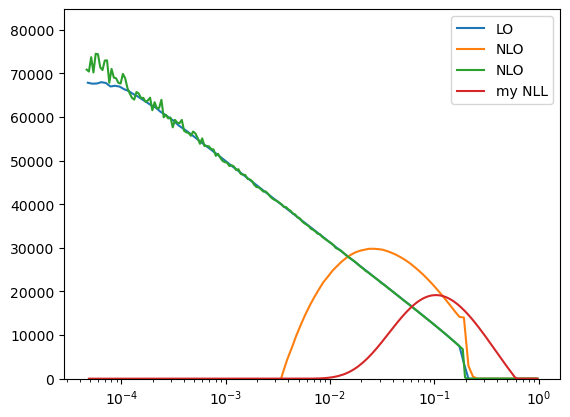

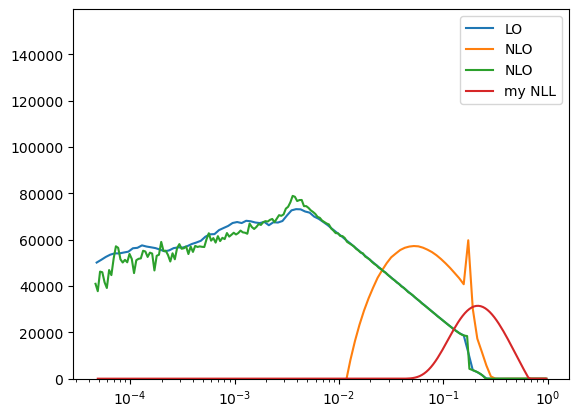

In [185]:
##############  NLL Test  ################

for O in dists1:    
    dist=dists1[O]["CENTRAL"]
    dist2=dists[O]["CENTRAL"]
    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(np.exp(dist2.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('D','LO')
    y1_sherpa=dist2('D','LO')
    plt.semilogx(np.exp(dist.BinMids),y1,label='LO')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('D','NLO')
    y2_sherpa=dist2('D','NLO')

 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist2.BinMids[1::]-dist2.BinMids[:199])

    a.run(v[1:],deltaF=spacing,diff=False)
    plt.semilogx(np.exp(dist.BinMids),y2,label=r'NLO')
    plt.semilogx(np.exp(dist2.BinMids),y2_sherpa,label=r'NLO')

    plt.semilogx(np.exp(dist2.BinMids)[1:],dist2.sigma0*a.diff,label='my NLL')
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
    plt.ylim(0,10000+np.max(dist2('D','expLO')))
    plt.legend()
   # plt.xlim(0,1)
    plt.show()


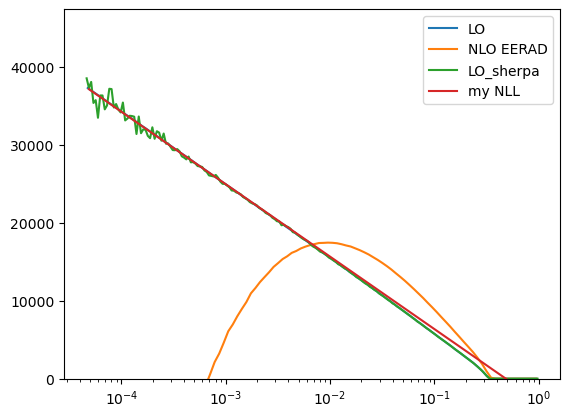

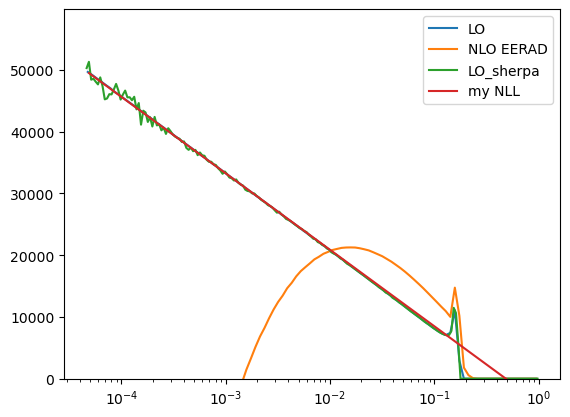

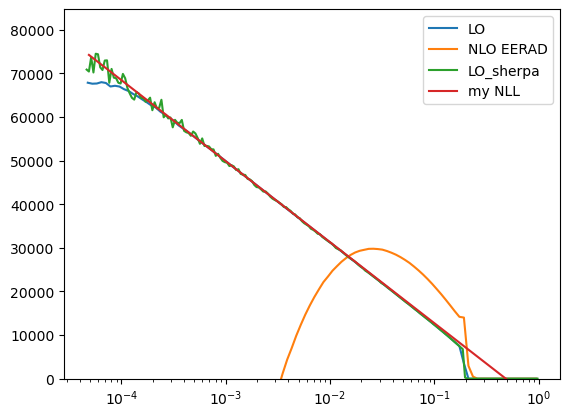

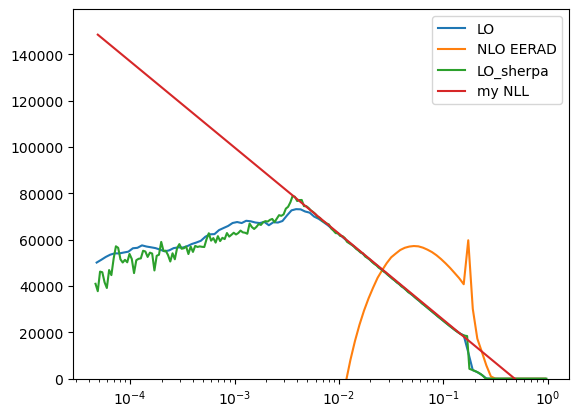

In [259]:
##############  Expansion Test  ################

for O in dists1:    
    dist=dists1[O]["CENTRAL"]
    dist2=dists[O]["CENTRAL"]
    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(np.exp(dist2.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('D','LO')
    y1_sherpa=dist2('D','LO')
    plt.semilogx(np.exp(dist.BinMids),y1,label='LO')
    #plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='LO')
    y2=dist('D','NLO')
    y2_sherpa=dist2('D','NLO')

 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist2.BinMids[1::]-dist2.BinMids[:199])

    a.run_FO_symbolic(v[1:],deltaF=spacing,diff=False)
    plt.semilogx(np.exp(dist.BinMids),y2,label=r'NLO EERAD')
    plt.semilogx(np.exp(dist2.BinMids),y2_sherpa,label=r'LO_sherpa')

    plt.semilogx(np.exp(dist2.BinMids)[1:],dist2.sigma0*a.diff,label='my NLL')
   # plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
    plt.ylim(0,10000+np.max(dist2('D','expLO')))
    plt.legend()
   # plt.xlim(0,1)
    plt.show()


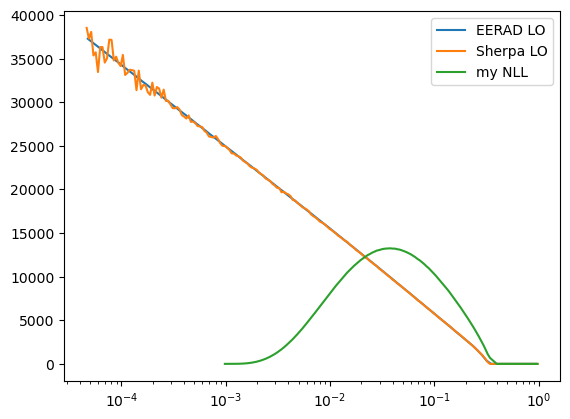

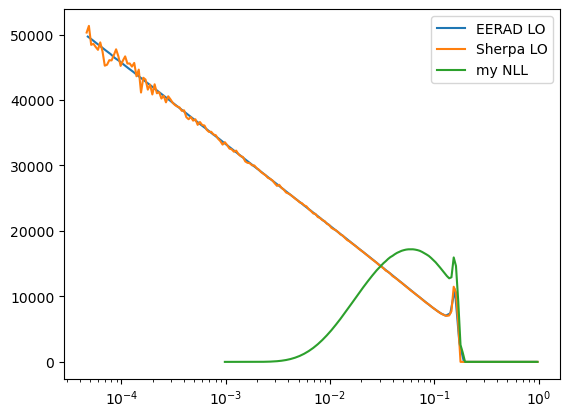

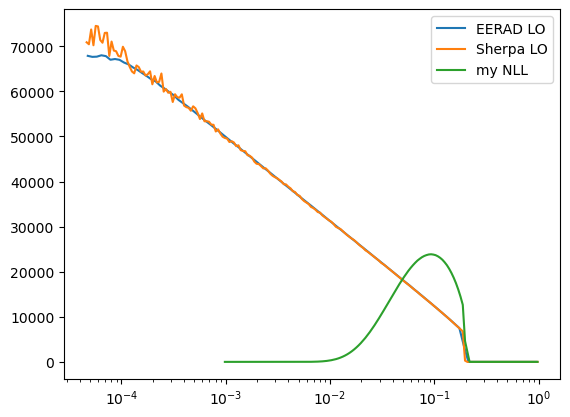

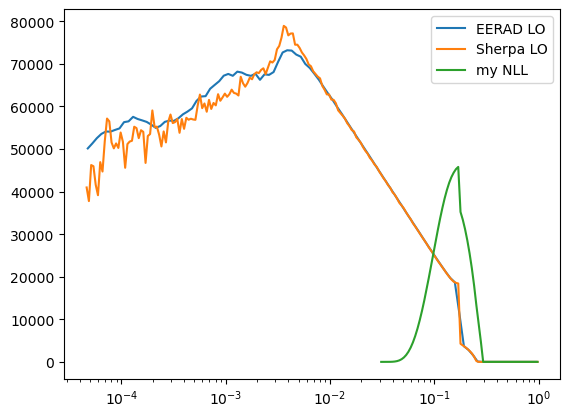

In [261]:


a.logRmatch(v,endpoint=endpoint1,deltaF=v[1::],LO=LO)

##############  NLL+NLO Test  ################

for O in dists1:    
    dist=dists1[O]["CENTRAL"]
    dist2=dists[O]["CENTRAL"]
    
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(np.exp(dist2.BinMids),0,0)
 #   a.alpha=dist2._nll_alphaS

   # plt.plot(np.exp(dist.BinMids),(dist('LO'))[1:]-dist.sigma0)
    y1=dist('D','LO')
    y1_sherpa=dist2('D','LO')
    plt.semilogx(np.exp(dist.BinMids),y1,label='EERAD LO')
    plt.semilogx(np.exp(dist2.BinMids),y1_sherpa,label='Sherpa LO')
    y2=dist('D','NLO')
    y2_sherpa=dist2('D','NLO')

 #   vmax=1/3
 #   v2=1/(1/v-1/vmax+1)
 #   v2[v2<0]=1
 #   v2[v2>1]=1
    spacing=1/(dist2.BinMids[1::]-dist2.BinMids[:199])
    #plt.semilogx(v,dist2('LO'),label='LO')
    LO=a.get_LO(dist2('ScaleBy','sigma0','LO')-1,v)
    
    #plt.semilogx(v,dist.sigma0*(LO(v))/(2*np.pi/a.alpha),linestyle='dashed',label='LO_1d')
    endpoint1=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])
    a.logRmatch(v[1:],endpoint=endpoint1,deltaF=spacing,diff=False,LO=LO)
    
  #  plt.semilogx(np.exp(dist.BinMids),y2,label=r'NLO')
  #  plt.semilogx(np.exp(dist2.BinMids),y2_sherpa,label=r'NLO')

    plt.semilogx(np.exp(dist2.BinMids)[1:],dist2.sigma0*a.diff,label='my NLL')
    #plt.semilogx(np.exp(dist2.BinMids),dist2('D','expLO'),label='NLL sherpa')
 #   plt.ylim(0,10000+np.max(dist2('D','expLO')))
    plt.legend()
   # plt.xlim(0,1)
    plt.show()


In [80]:
for O in dists1:
    dist=dists1[O]["CENTRAL"]
    dist2=dists[O]["CENTRAL"]
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(np.exp(dist.BinMids),0,0)
    a.run(v,deltaF=v[1::])
    y1,scale1=rescale(dist('ScaleBy','sigma0','LO'),offset=60)
    y2=rescale((dist('LO'))[1:]+(dist('NLO'))[1:],offset=40)[0]
    
    print(scale1,scale2)

   # plt.semilogx(v,y1)
   # plt.semilogx(v,y2)
   # plt.semilogx(v[1:],a.diff,label='NLL')
    LO=a.get_LO( y1-1,v )
    NLO=a.get_NLO( LO(v[1:]) , y2 ,v[1:])
    endpoint1=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])
    skip=40
    endpoint2=1/3
    # min(np.exp(dist.BinMids)[ np.insert(dist('ScaleBy','sigma0','NLO')[skip+1::]<=dist('ScaleBy','sigma0','NLO')[:len(dist.BinMids)-skip:],[False for i in range(skip)],0) ]     )  
    print(endpoint2)
    a.logRmatch(v[1:],endpoint=endpoint1,deltaF=v[2::],LO=LO)
    plt.semilogx(v[2:],a.diff,label='NLL+LO')
    y3,scale3=rescale(dist2('ScaleBy','sigma0','LO'),offset=60)
    plt.semilogx(np.exp(dist2.BinMids),dist2('D','ScaleBy','sigma0','LO')*1/scale3,label="LO2")
  #  plt.semilogx(np.exp(dist2.BinMids),y3[1:])
    a.logRmatch(v[1:],endpoint=endpoint2,deltaF=v[2::],LO=LO,NLO=NLO)
    plt.semilogx(v[2:],a.diff,label='NLL+NLO')
    plt.legend()
   # plt.ylim(0,.05)
    plt.xlim(0,0.4)
    plt.show()


NameError: name 'scale2' is not defined

4.236260476537811 1.7617464284428141
0.3333333333333333


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:704: RuntimeWarning: divide by zero encountered in log
  A=len(L)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:616: RuntimeWarning: divide by zero encountered in log
  if A>1:
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:688: RuntimeWarning: divide by zero encountered in scalar divide
  res=0
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:696: RuntimeWarning: invalid value encountered in scalar subtract
  if NLO:
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:688: RuntimeWarning: invalid value encountered in log
  res=0


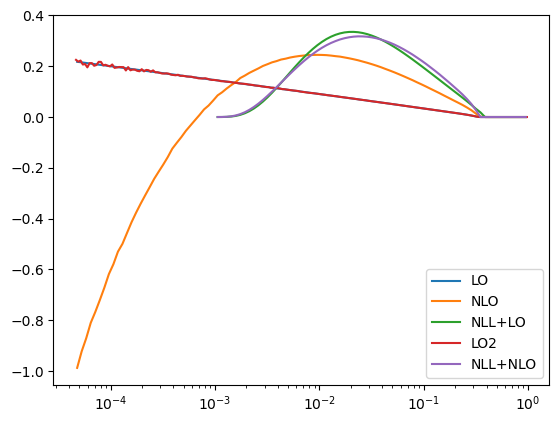

5.650830613878184 1.870608543389634
0.3333333333333333


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:699: RuntimeWarning: invalid value encountered in scalar subtract
  


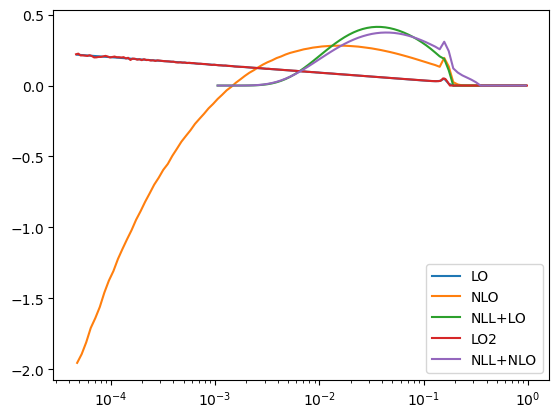

8.374501760912345 2.2251178640778426
0.3333333333333333


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:64: RuntimeWarning: invalid value encountered in scalar divide
  np.log(1-2*lamb/a_l)+ 2/a_l*(lamb/(1-2/a_l*lamb)))  -self.beta_1/(2*np.pi*self.beta_0**3)*(
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:95: RuntimeWarning: invalid value encountered in scalar divide
  return 2/a_l**2*1/(np.pi*self.beta_0)*lamb/(1-2*lamb/a_l)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:694: RuntimeWarning: invalid value encountered in log
  res+= float(self.alpha/(2*np.pi)*(  self.R[1](y)   -self.G[1,1]*L_-self.G[1,2]*L_**2) )
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:694: RuntimeWarning: divide by zero encountered in log
  res+= float(self.alpha/(2*np.pi)*(  self.R[1](y)   -self.G[1,1]*L_-self.G[1,2]*L_**2) )


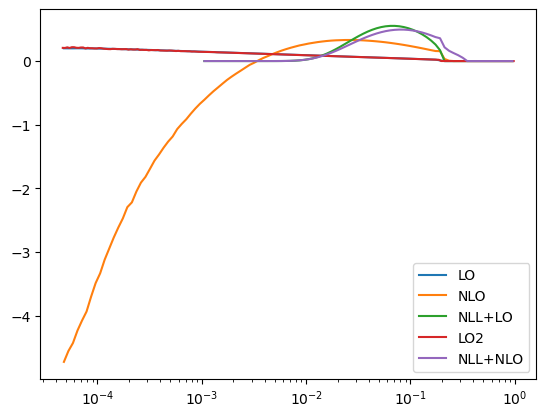

11.09532115148509 3.2267579348543416
0.3333333333333333


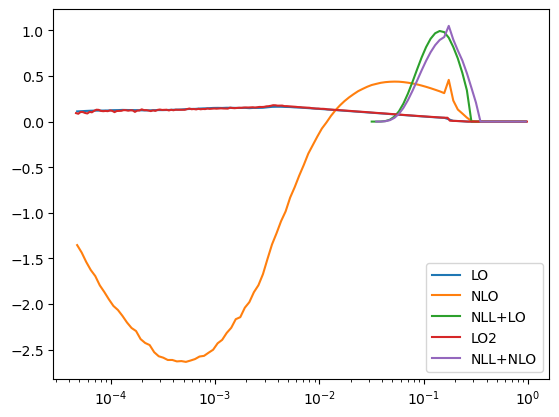

In [81]:
for O in dists1:
    dist=dists1[O]["CENTRAL"]
    dist2=dists[O]["CENTRAL"]
    a=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    v=np.insert(np.exp(dist.BinMids),0,0)
    a.run(v,deltaF=v[1::])
    y1,scale1=rescale(dist('ScaleBy','sigma0','LO'),offset=60)
    y2,scale2=rescale(dist('ScaleBy','sigma0','NLO'),offset=60)
    
    print(scale1,scale2)
    plt.semilogx(v[1:],dist('D','ScaleBy','sigma0','LO')*1/scale1,label="LO")
    plt.semilogx(v[1:],dist('D','ScaleBy','sigma0','NLO')/scale2,label="NLO")
   # plt.semilogx(v,y1)
   # plt.semilogx(v,y2)
   # plt.semilogx(v[1:],a.diff,label='NLL')
    LO=a.get_LO( y1-1,v )
    NLO=a.get_NLO( LO(v) , y2 ,v)
    endpoint1=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])
    skip=40
    endpoint2=1/3
    # min(np.exp(dist.BinMids)[ np.insert(dist('ScaleBy','sigma0','NLO')[skip+1::]<=dist('ScaleBy','sigma0','NLO')[:len(dist.BinMids)-skip:],[False for i in range(skip)],0) ]     )  
    print(endpoint2)
    a.logRmatch(v,endpoint=endpoint1,deltaF=v[1::],LO=LO)
    plt.semilogx(v[1:],a.diff,label='NLL+LO')
    y3,scale3=rescale(dist2('ScaleBy','sigma0','LO'),offset=60)
    plt.semilogx(np.exp(dist2.BinMids),dist2('D','ScaleBy','sigma0','LO')*1/scale3,label="LO2")
  #  plt.semilogx(np.exp(dist2.BinMids),y3[1:])
    a.logRmatch(v,endpoint=endpoint2,deltaF=v[1::],LO=LO,NLO=NLO)
    plt.semilogx(v[1:],a.diff,label='NLL+NLO')
    plt.legend()
   # plt.ylim(0,.05)
  #  plt.xlim(0,0.5)
    plt.show()

In [ ]:
print(dists['TL']['CENTRAL'].sigma0)

In [ ]:
import resummation_class as my_rs


def rescale(arr):
    notnan=np.logical_not(np.isnan(arr))
    if np.max(arr[notnan])!=np.min(arr[notnan]):
        return arr*(1/(np.max(arr[notnan])-0*np.min(arr[notnan])))


0.9999297264360522


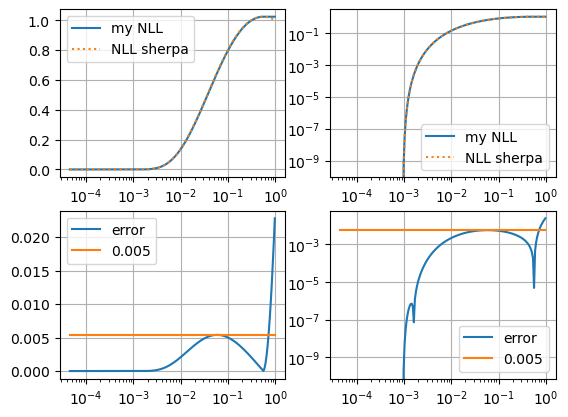

In [82]:
#######comparing thrust resummation


#f=open("resumqq.txt")
#import csv
#f=open("resum_a=[1, 1],b=[1, 1],g=[1, 1]d=[1, 1]qq.txt")
#r=csv.reader(f)
#r=[i for i in r]
#N=len(r)
#res=np.zeros(N)

#for i in range(N):
#    res[i]=float(r[i][0])

#N=len(res)


v=np.zeros(len(dists['TL']['CENTRAL'].BinMids)+1)
v[1::]=dists['TL']['CENTRAL'].BinMids
#print(v[1::])
v[0]=-10
#print(v[1::]-v[:200])
v=np.exp(v)

a=my_rs.Resummation([1,1],[1,1],[1,1],[1,1])
a.run(v,deltaF=v[1::])
y1=a.resum
y2=dists['TL']['CENTRAL']('ScaleBy','sigma0','NLL')
y2[y2<0]=0


#print((v[1::]-v[:200])/v[1::])
#print(np.log(v)[1::]-np.log((v[:200])))

print(np.max(y1)/np.max(y2))

plt.subplot(2,2,1)
plt.semilogx(v,y1,label="my NLL")
plt.semilogx(v,y2,label="NLL sherpa",ls="dotted")

plt.legend()
plt.grid()
#plt.ylim(10**-8,1.2)
#plt.xlim(-10,0)



plt.subplot(2,2,2)
plt.loglog(v,y1,label="my NLL")
plt.loglog(v,y2,label="NLL sherpa",ls="dotted")

plt.legend()
plt.grid()
#plt.ylim(10**-8,1.2)
#plt.xlim(-10,0)


plt.subplot(2,2,3)
err=np.abs(y1-y2)
plt.semilogx(v,err,label="error")
plt.grid()
plt.semilogx(v,[np.max(err[:190:])  for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
#plt.xlim(-10,0)



plt.subplot(2,2,4)
err=np.abs(y1-y2)
plt.loglog(v,err,label="error")
plt.grid()
plt.loglog(v,[np.max(err[:190:]) for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
#plt.xlim(-10,0)
#plt.ylim(10**-8,1.2)
plt.savefig(f"plots/b={a.b}_compare.pdf")
plt.show()








In [ ]:
diff1=(y1[1::]-y1[:200:])/(v[1::]-v[:200:])*v[1::]
diff2=(y2[1::]-y2[:200:])/(v[1::]-v[:200:])*v[1::]
diff3=dists['TL']['CENTRAL']('ScaleBy','sigma0','D','NLL')
plt.loglog(v[1::],diff1,ls='dotted',label=1)
plt.loglog(v[1::],diff2,ls='dotted',label=2)
plt.loglog(v[1::],diff3,ls='dashed',label=3,alpha=0.5)
plt.legend()
plt.show()


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:73: RuntimeWarning: invalid value encountered in log
  (a_l - 2*lamb)*np.log(1-2*lamb/a_l)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:80: RuntimeWarning: invalid value encountered in log
  self.K/(4*np.pi**2*self.beta_0**2)*((a_l+b_l)*np.log(1 - 2*lamb /(a_l+b_l)) - a_l*np.log(1 - 2*lamb/a_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:82: RuntimeWarning: invalid value encountered in log
  a_l/2 * np.log(1-2*lamb/a_l)**2 - (a_l+b_l) /
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:84: RuntimeWarning: invalid value encountered in log
  + a_l*np.log(1-2*lamb/a_l) - (a_l+b_l)*np.log(1-2*lamb/(a_l+b_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:41: RuntimeWarning: invalid value encountered in log
  return -1/(np.pi*self.beta_0)*np.log(1-2*lamb)


1.0211961771048255


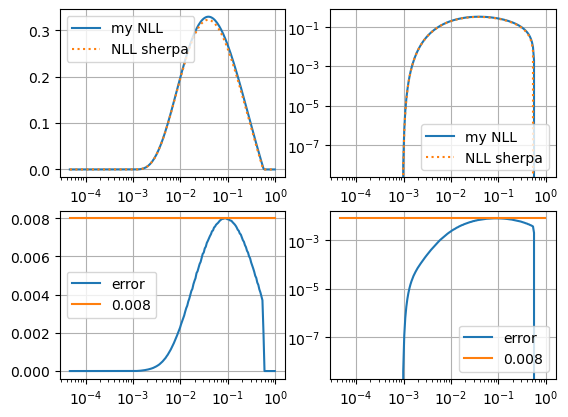

In [83]:
#######comparing thrust resummation


#f=open("resumqq.txt")
#import csv
#f=open("resum_a=[1, 1],b=[1, 1],g=[1, 1]d=[1, 1]qq.txt")
#r=csv.reader(f)
#r=[i for i in r]
#N=len(r)
#res=np.zeros(N)

#for i in range(N):
#    res[i]=float(r[i][0])

#N=len(res)


v=np.zeros(len(dists['TL']['CENTRAL'].BinMids)+1)
v[1::]=dists['TL']['CENTRAL'].BinMids
#print(v[1::])
v[0]=-10
#print(v[1::]-v[:200])
v=np.exp(v)

a=my_rs.Resummation([1,1],[1,1],[1,1],[1,1])
a.run(v,deltaF=v[1::])
y1=a.diff
y2=dists['TL']['CENTRAL']('ScaleBy','sigma0','D','NLL')
y2[y2<0]=0
y1[y1<0]=0


#print((v[1::]-v[:200])/v[1::])
#print(np.log(v)[1::]-np.log((v[:200])))

print(np.max(y1)/np.max(y2))

plt.subplot(2,2,1)
plt.semilogx(v[1::],y1,label="my NLL")
plt.semilogx(v[1::],y2,label="NLL sherpa",ls="dotted")

plt.legend()
plt.grid()
#plt.ylim(10**-8,1.2)
#plt.xlim(-10,0)



plt.subplot(2,2,2)
plt.loglog(v[1::],y1,label="my NLL")
plt.loglog(v[1::],y2,label="NLL sherpa",ls="dotted")

plt.legend()
plt.grid()
#plt.ylim(10**-8,1.2)
#plt.xlim(-10,0)


plt.subplot(2,2,3)
err=np.abs(y1-y2)
plt.semilogx(v[1::],err,label="error")
plt.grid()
plt.semilogx(v[1::],[np.max(err[:190:])  for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
#plt.xlim(-10,0)



plt.subplot(2,2,4)
err=np.abs(y1-y2)
plt.loglog(v[1::],err,label="error")
plt.grid()
plt.loglog(v[1::],[np.max(err[:190:]) for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
#plt.xlim(-10,0)
#plt.ylim(10**-8,1.2)
plt.savefig(f"plots/b={a.b}_compare.pdf")
plt.show()


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:73: RuntimeWarning: invalid value encountered in log
  (a_l - 2*lamb)*np.log(1-2*lamb/a_l)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:80: RuntimeWarning: invalid value encountered in log
  self.K/(4*np.pi**2*self.beta_0**2)*((a_l+b_l)*np.log(1 - 2*lamb /(a_l+b_l)) - a_l*np.log(1 - 2*lamb/a_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:82: RuntimeWarning: invalid value encountered in log
  a_l/2 * np.log(1-2*lamb/a_l)**2 - (a_l+b_l) /
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:84: RuntimeWarning: invalid value encountered in log
  + a_l*np.log(1-2*lamb/a_l) - (a_l+b_l)*np.log(1-2*lamb/(a_l+b_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:41: RuntimeWarning: invalid value encountered in log
  return -1/(np.pi*self.beta_0)*np.log(1-2*lamb)
/tmp/ipykernel_3703817/701867378.py:23: UserWarning: Attempt to set non-po

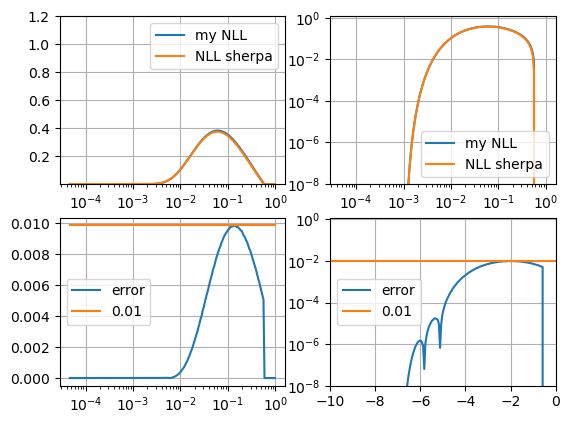

In [84]:
v=np.zeros(len(dists['FC2']['CENTRAL'].BinMids)+1)
v[1::]=dists['FC2']['CENTRAL'].BinMids
#print(v[1::])
v[0]=-10
#print(v[1::]-v[:200])
v=np.exp(v)

a=my_rs.Resummation([1,1],[1,1],[0.5,0.5],[1,1])
a.run(v,deltaF=v[1::])
y1=a.diff
y2=dists['FC1']['CENTRAL']('ScaleBy','sigma0','D','NLL')
y2[y2<0]=0
y1[y1<0]=0


plt.subplot(2,2,1)
plt.semilogx(v[1::],y1,label="my NLL")
plt.semilogx(v[1::],y2,label="NLL sherpa")

plt.legend()
plt.grid()
plt.ylim(10**-8,1.2)
plt.xlim(-10,0)



plt.subplot(2,2,2)
plt.loglog(v[1::],y1,label="my NLL")
plt.loglog(v[1::],y2,label="NLL sherpa")

plt.legend()
plt.grid()
plt.ylim(10**-8,1.2)
plt.xlim(-10,0)


plt.subplot(2,2,3)
err=np.abs(y1-y2)
plt.semilogx(v[1::],err,label="error")
plt.grid()
plt.semilogx(v[1::],[np.max(err[:190:]) for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
plt.xlim(-10,0)



plt.subplot(2,2,4)
err=np.abs(y1-y2)
plt.semilogy(np.log(v[1::]),err,label="error")
plt.grid()
plt.semilogy(np.log(v[1::]),[np.max(err[:190:]) for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
plt.xlim(-10,0)
plt.ylim(10**-8,1.2)
plt.savefig(f"plots/b={a.b}_compare.pdf")
plt.show()





/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:73: RuntimeWarning: invalid value encountered in log
  (a_l - 2*lamb)*np.log(1-2*lamb/a_l)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:74: RuntimeWarning: invalid value encountered in log
  - (a_l+b_l - 2*lamb)*np.log(1-2*lamb/(a_l+b_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:80: RuntimeWarning: invalid value encountered in log
  self.K/(4*np.pi**2*self.beta_0**2)*((a_l+b_l)*np.log(1 - 2*lamb /(a_l+b_l)) - a_l*np.log(1 - 2*lamb/a_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:82: RuntimeWarning: invalid value encountered in log
  a_l/2 * np.log(1-2*lamb/a_l)**2 - (a_l+b_l) /
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:83: RuntimeWarning: invalid value encountered in log
  2*np.log(1-2*lamb/(a_l+b_l))**2
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:84: RuntimeWarning: invalid value enc

1.020889351489349


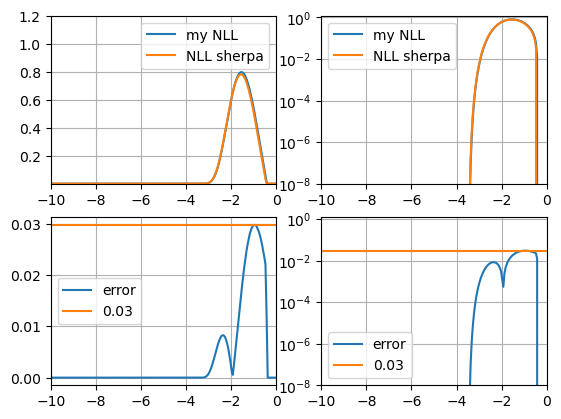

In [85]:
v=np.zeros(len(dists['FC3']['CENTRAL'].BinMids)+1)
v[1::]=dists['FC3']['CENTRAL'].BinMids
#print(v[1::])
v[0]=-10
#print(v[1::]-v[:200])
v=np.exp(v)

a=my_rs.Resummation([1,1],[1,1],[-0.5,-0.5],[1,1])
a.run(v,deltaF=v[1::])
y1=a.diff
y2=dists['FC3']['CENTRAL']('ScaleBy','sigma0','D','NLL')
y2[y2<0]=0

print(np.max(y1)/np.max(y2))

plt.subplot(2,2,1)
plt.plot(np.log(v[1::]),y1,label="my NLL")
plt.plot(np.log(v[1::]),y2,label="NLL sherpa")

plt.legend()
plt.grid()
plt.ylim(10**-8,1.2)
plt.xlim(-10,0)



plt.subplot(2,2,2)
plt.semilogy(np.log(v[1::]),y1,label="my NLL")
plt.semilogy(np.log(v[1::]),y2,label="NLL sherpa")

plt.legend()
plt.grid()
plt.ylim(10**-8,1.2)
plt.xlim(-10,0)


plt.subplot(2,2,3)
err=np.abs(y1-y2)
plt.plot(np.log(v[1::]),err,label="error")
plt.grid()
plt.plot(np.log(v[1::]),[np.max(err[:190:]) for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
plt.xlim(-10,0)



plt.subplot(2,2,4)
err=np.abs(y1-y2)
plt.semilogy(np.log(v[1::]),err,label="error")
plt.grid()
plt.semilogy(np.log(v[1::]),[np.max(err[:190:]) for i in err],label=f"{np.round(np.max(err[:190:]) ,decimals=3)}")
plt.legend()
plt.xlim(-10,0)
plt.ylim(10**-8,1.2)
plt.savefig(f"plots/b={a.b}_compare.pdf")
plt.show()



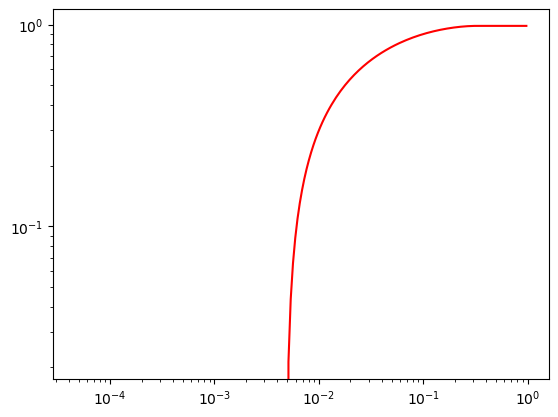

TL CENTRAL 40460.3 -505.868


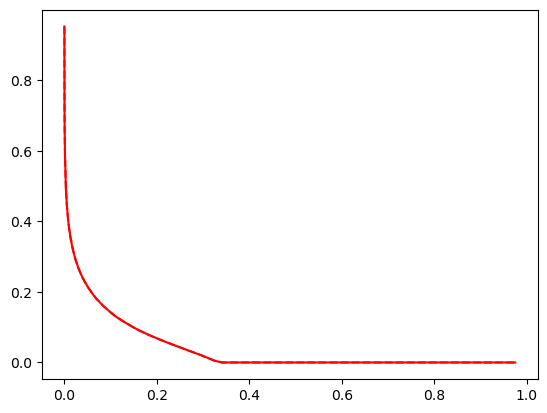

FC1 CENTRAL 40460.3 -505.868


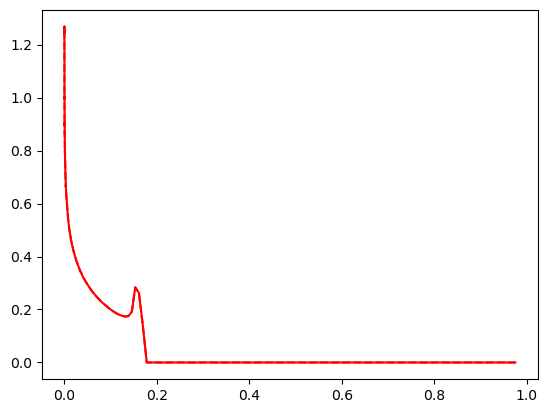

FC2 CENTRAL 40460.3 -505.868


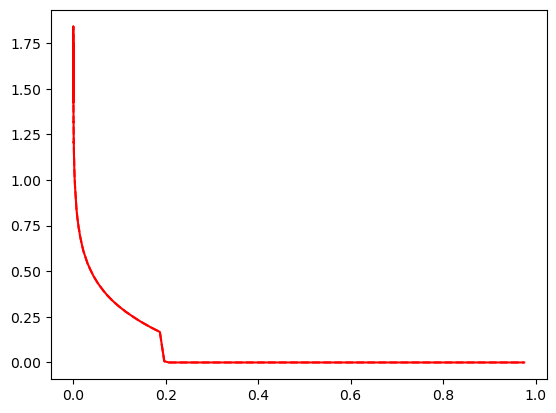

FC3 CENTRAL 40460.3 -505.868


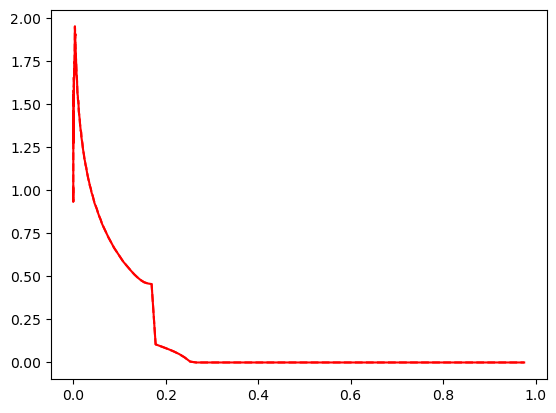

In [87]:
plt.loglog(np.insert(np.exp(dists['TL']['CENTRAL'].BinMids),0,0),dists['TL']['CENTRAL']('ScaleBy','sigma0','LO'),color='red',ls='solid')
plt.show()


colors = {'CENTRAL': 'red', 'MUR=0.5__MUF=1__LHAPDF=-1': 'blue', 'MUR=2__MUF=1__LHAPDF=-1': 'green'}
for O in dists:
    for var in dists[O]:
        dist = dists[O][var]
        print(O,var,dist.sigma0,dist.sigma1)
        plt.plot(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','LO'),color=colors[var],ls='solid')
        plt.plot(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],ls='dashed')
    plt.show()
    

TL


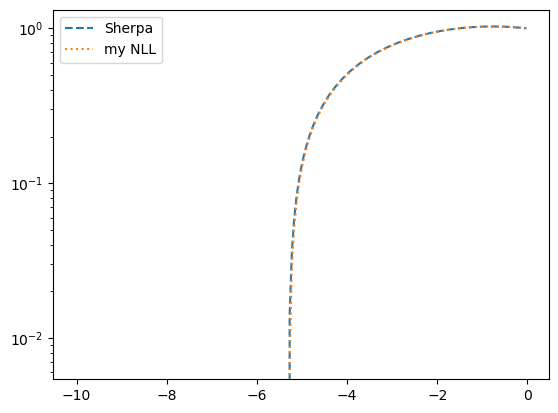

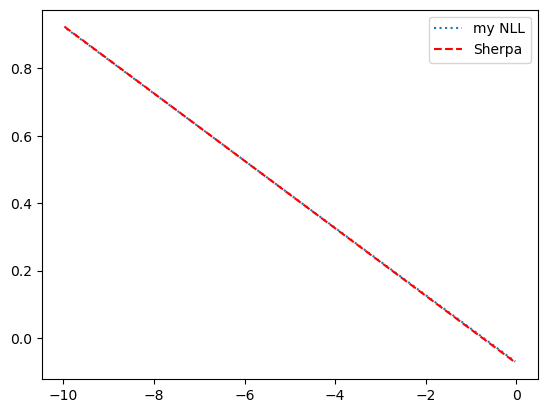

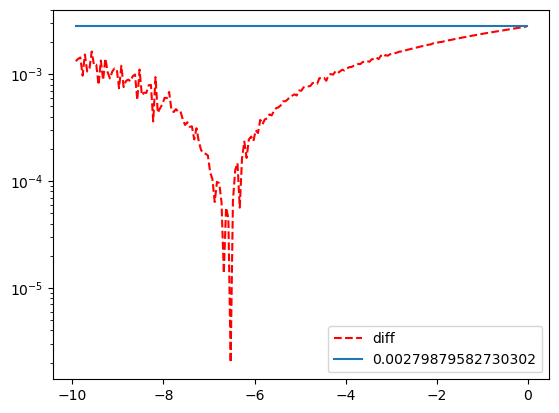

In [88]:
v=np.zeros(201)
v[0]=2*dist.BinMids[0]-dist.BinMids[1]
v[1::]=dist.BinMids
spacing=1/(v[1::]-v[:200])
a=my_rs.Resummation([1,1],[1,1],[1,1],[1,1],['q','q'])
a.run_FO_symbolic(np.exp(v[1::]),N=1,deltaF=spacing[1::],diff=False)
print('TL')

dist=dists['TL']['CENTRAL']
plt.semilogy(v,dist('ScaleBy','sigma0','expLO'),ls='dashed',label="Sherpa")
plt.semilogy(v[1::],a.resum,ls='dotted',label="my NLL")
plt.legend()
plt.show()




plt.plot(v[2::],a.diff,ls='dotted',label="my NLL")
plt.plot(v[1::],dist('ScaleBy','sigma0','D','expLO'),color=colors[var],ls='dashed',label="Sherpa")
#plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],label="NLO")
plt.legend()
plt.show()


err=np.abs(a.diff-dist('ScaleBy','sigma0','D','expLO')[1::])
plt.semilogy(v[2::],err,color=colors[var],ls='dashed',label="diff")
plt.plot(v[2::],[np.max(err) for i in err],label=f"{np.max(err)}")
plt.legend()
plt.show()



FC3


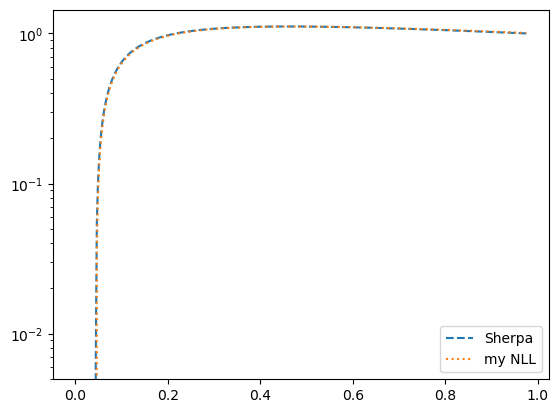

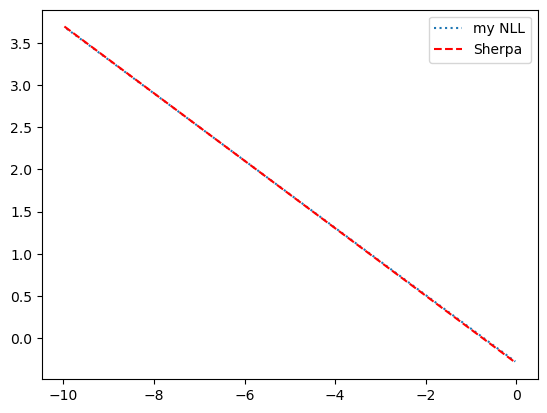

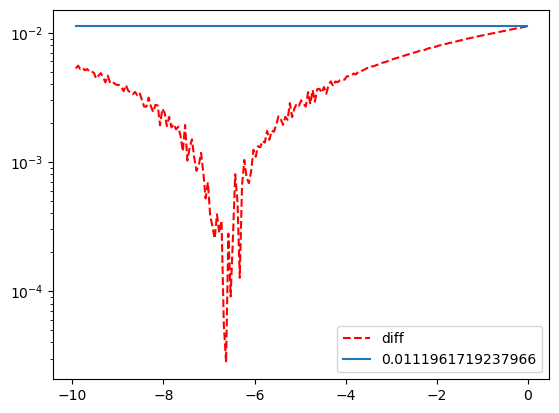

In [89]:
dist=dists['FC3']['CENTRAL']
v=np.zeros(201)
v[0]=2*dist.BinMids[0]-dist.BinMids[1]
v[1::]=dist.BinMids
spacing=1/(v[1::]-v[:200])
a=my_rs.Resummation([1,1],[1,1],[-0.5,-0.5],[1,1],['q','q'])
a.run_FO_symbolic(np.exp(v[1::]),N=1,deltaF=spacing[1::],diff=False)
print('FC3')

plt.semilogy(np.exp(v),dist('ScaleBy','sigma0','expLO'),ls='dashed',label="Sherpa")
plt.semilogy(np.exp(v[1::]),a.resum,ls='dotted',label="my NLL")
plt.legend()
plt.show()




plt.plot(v[2::],a.diff,ls='dotted',label="my NLL")
plt.plot(v[1::],dist('ScaleBy','sigma0','D','expLO'),color=colors[var],ls='dashed',label="Sherpa")
#plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],label="NLO")
plt.legend()
plt.show()


err=np.abs(a.diff-dist('ScaleBy','sigma0','D','expLO')[1::])
plt.semilogy(v[2::],err,color=colors[var],ls='dashed',label="diff")
plt.plot(v[2::],[np.max(err) for i in err],label=f"{np.max(err)}")
plt.legend()
plt.show()



FC2


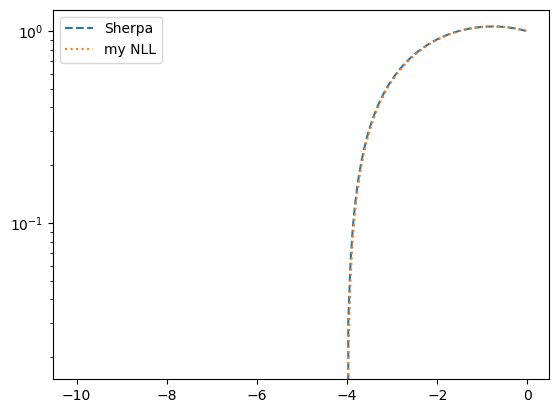

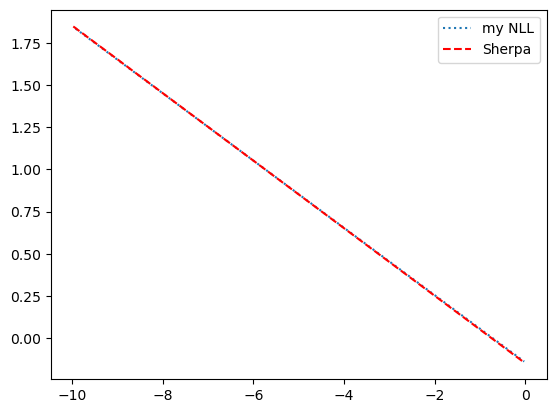

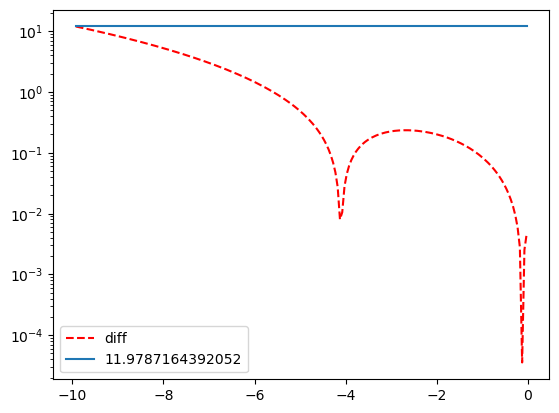

In [90]:
dist=dists['FC2']['CENTRAL']

v=np.zeros(201)
v[0]=2*dist.BinMids[0]-dist.BinMids[1]
v[1::]=dist.BinMids
spacing=1/(v[1::]-v[:200])
a=my_rs.Resummation([1,1],[1,1],[0,0],[1,1],['q','q'])
a.run_FO_symbolic(np.exp(v[1::]),N=1,deltaF=spacing[1::],diff=False)
print('FC2')

plt.semilogy(v,dist('ScaleBy','sigma0','expLO'),ls='dashed',label="Sherpa")
plt.semilogy(v[1::],a.resum,ls='dotted',label="my NLL")
plt.legend()
plt.show()




plt.plot(v[2::],a.diff,ls='dotted',label="my NLL")
plt.plot(v[1::],dist('Normalise',,'D','expLO'),color=colors[var],ls='dashed',label="Sherpa")
#plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],label="NLO")
plt.legend()
plt.show()

err=np.abs(a.diff-dist('ScaleBy','sigma0','D','expNLO')[1::])
plt.semilogy(v[2::],err,color=colors[var],ls='dashed',label="diff")
plt.plot(v[2::],[np.max(err) for i in err],label=f"{np.max(err)}")
plt.legend()
plt.show()



TL


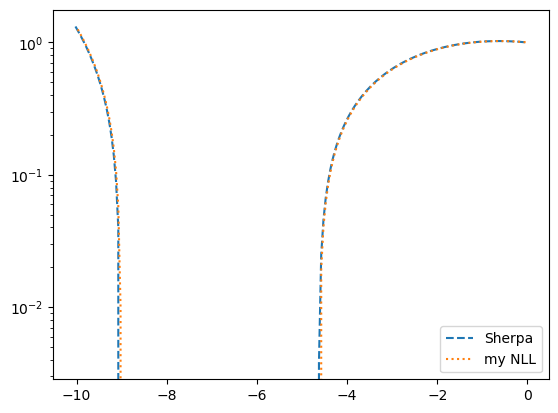

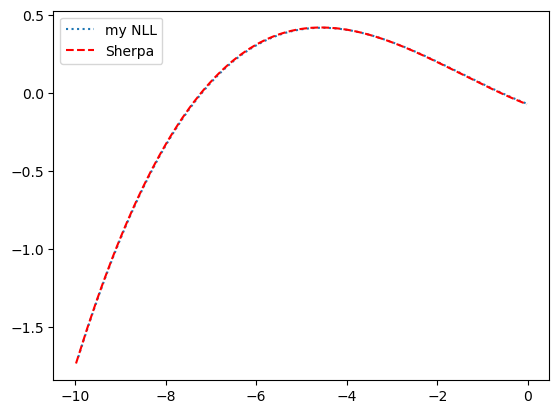

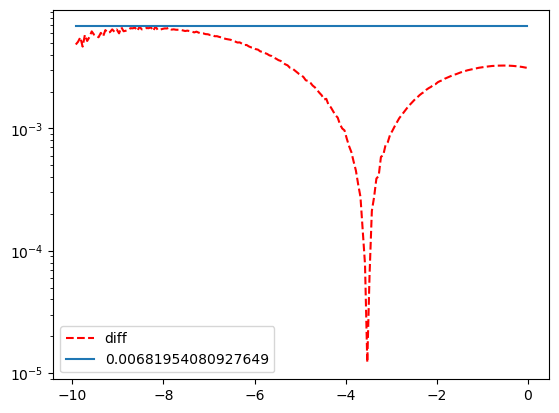

In [91]:
v=np.zeros(201)
v[0]=2*dist.BinMids[0]-dist.BinMids[1]
v[1::]=dist.BinMids
spacing=1/(v[1::]-v[:200])
a=my_rs.Resummation([1,1],[1,1],[1,1],[1,1],['q','q'])
a.run_FO_symbolic(np.exp(v[1::]),N=2,deltaF=spacing[1::],diff=False)
print('TL')

dist=dists['TL']['CENTRAL']
plt.semilogy(v,dist('ScaleBy','sigma0','expNLO'),ls='dashed',label="Sherpa")
plt.semilogy(v[1::],a.resum,ls='dotted',label="my NLL")
plt.legend()
plt.show()




plt.plot(v[2::],a.diff,ls='dotted',label="my NLL")
plt.plot(v[1::],dist('ScaleBy','sigma0','D','expNLO'),color=colors[var],ls='dashed',label="Sherpa")
#plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],label="NLO")
plt.legend()
plt.show()


err=np.abs(a.diff-dist('ScaleBy','sigma0','D','expNLO')[1::])
plt.semilogy(v[2::],err,color=colors[var],ls='dashed',label="diff")
plt.plot(v[2::],[np.max(err) for i in err],label=f"{np.max(err)}")
plt.legend()
plt.show()


FC3


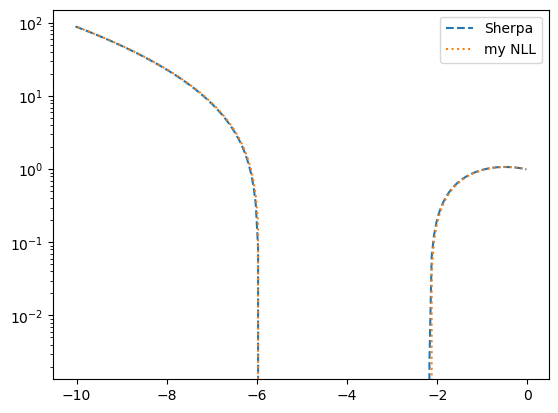

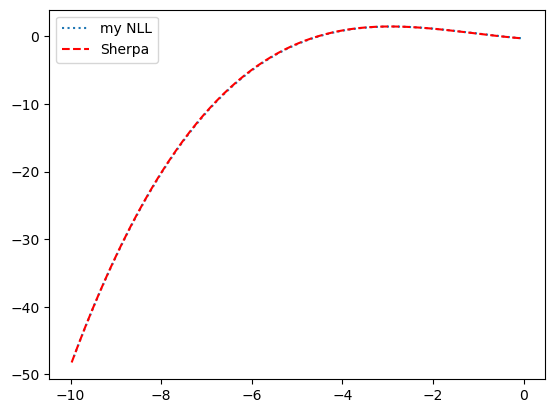

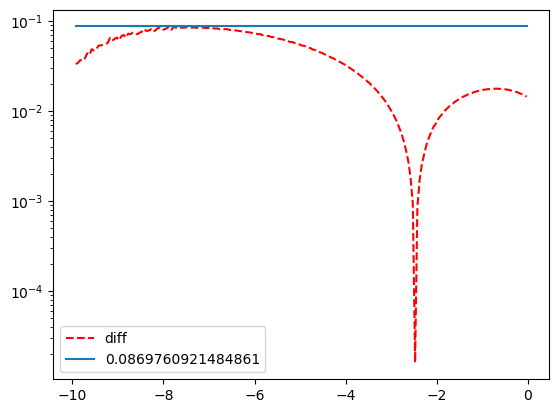

In [92]:
v=np.zeros(201)
v[0]=2*dist.BinMids[0]-dist.BinMids[1]
v[1::]=dist.BinMids
spacing=1/(v[1::]-v[:200])
a=my_rs.Resummation([1,1],[1,1],[-0.5,-0.5],[1,1],['q','q'])
a.run_FO_symbolic(np.exp(v[1::]),N=2,deltaF=spacing[1::],diff=False)
print('FC3')

dist=dists['FC3']['CENTRAL']
plt.semilogy(v,dist('ScaleBy','sigma0','expNLO'),ls='dashed',label="Sherpa")
plt.semilogy(v[1::],a.resum,ls='dotted',label="my NLL")
plt.legend()
plt.show()




plt.plot(v[2::],a.diff,ls='dotted',label="my NLL")
plt.plot(v[1::],dist('ScaleBy','sigma0','D','expNLO'),color=colors[var],ls='dashed',label="Sherpa")
#plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],label="NLO")
plt.legend()
plt.show()


err=np.abs(a.diff-dist('ScaleBy','sigma0','D','expNLO')[1::])
plt.semilogy(v[2::],err,color=colors[var],ls='dashed',label="diff")
plt.plot(v[2::],[np.max(err) for i in err],label=f"{np.max(err)}")
plt.legend()
plt.show()


FC2


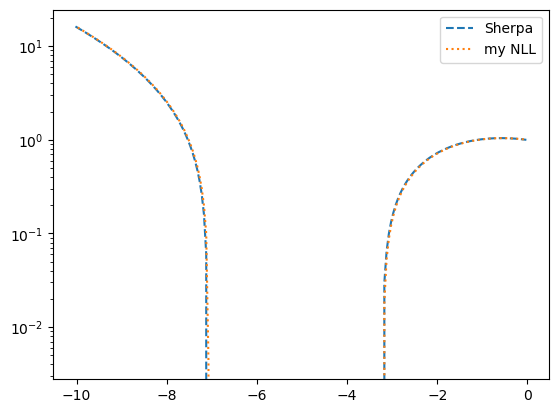

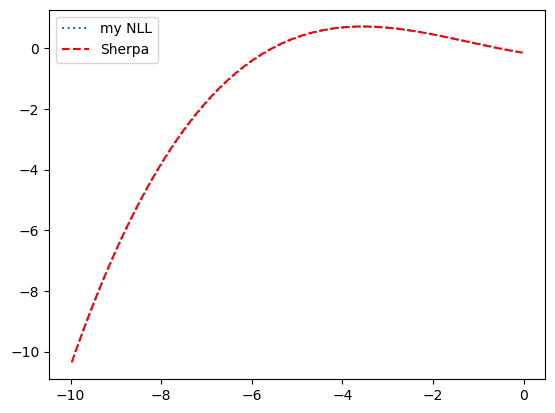

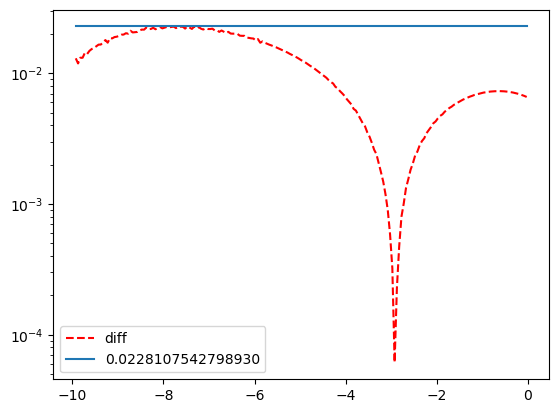

In [93]:
v=np.zeros(201)
v[0]=2*dist.BinMids[0]-dist.BinMids[1]
v[1::]=dist.BinMids
spacing=1/(v[1::]-v[:200])
a=my_rs.Resummation([1,1],[1,1],[-0.0,-0.0],[1,1],['q','q'])
a.run_FO_symbolic(np.exp(v[1::]),N=2,deltaF=spacing[1::],diff=False)
print('FC2')

dist=dists['FC2']['CENTRAL']
plt.semilogy(v,dist('ScaleBy','sigma0','expNLO'),ls='dashed',label="Sherpa")
plt.semilogy(v[1::],a.resum,ls='dotted',label="my NLL")
plt.legend()
plt.show()




plt.plot(v[2::],a.diff,ls='dotted',label="my NLL")
plt.plot(v[1::],dist('ScaleBy','sigma0','D','expNLO'),color=colors[var],ls='dashed',label="Sherpa")
#plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLO'),color=colors[var],label="NLO")
plt.legend()
plt.show()


err=np.abs(a.diff-dist('ScaleBy','sigma0','D','expNLO')[1::])
plt.semilogy(v[2::],err,color=colors[var],ls='dashed',label="diff")
plt.plot(v[2::],[np.max(err) for i in err],label=f"{np.max(err)}")
plt.legend()
plt.show()

True
186


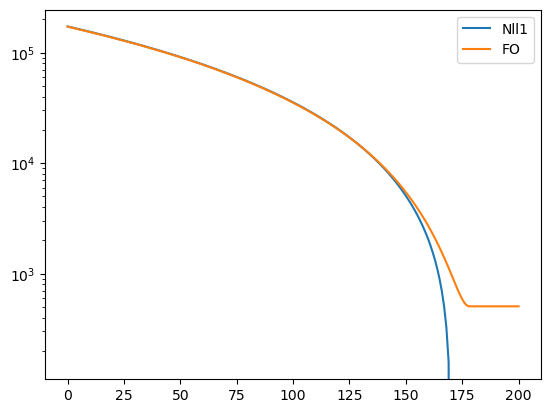

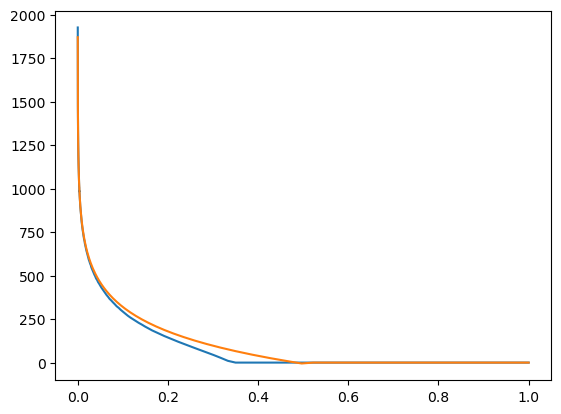

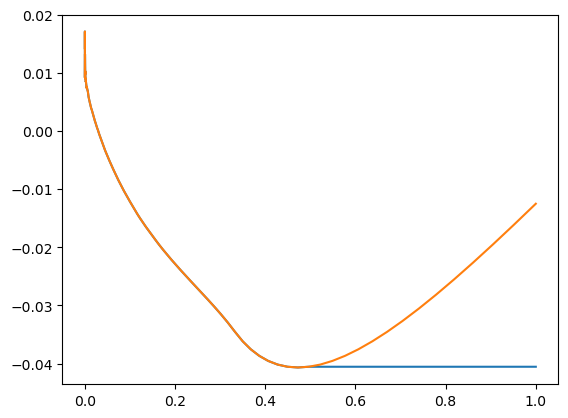

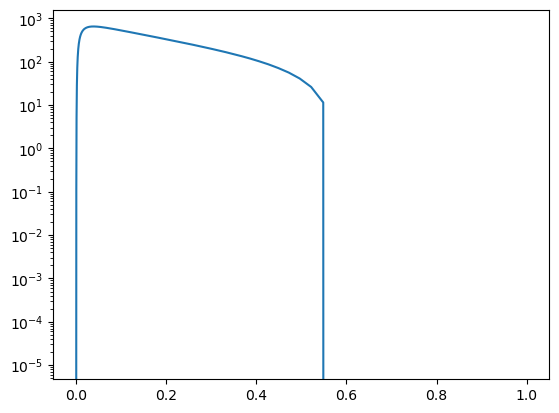

TL CENTRAL 40460.3 -505.868 39954.432


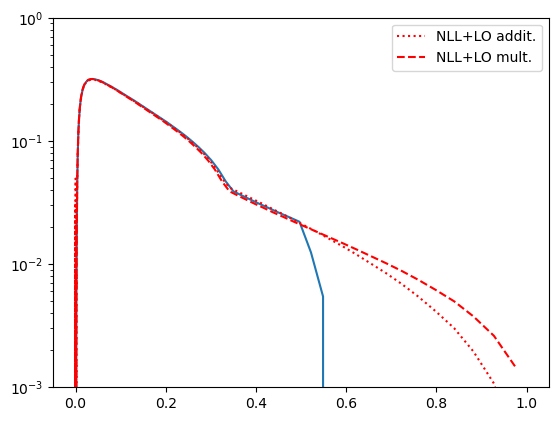

FC1 CENTRAL 40460.3 -505.868 39954.432


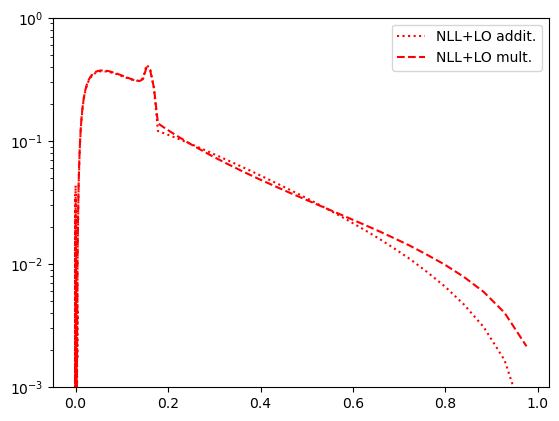

FC2 CENTRAL 40460.3 -505.868 39954.432


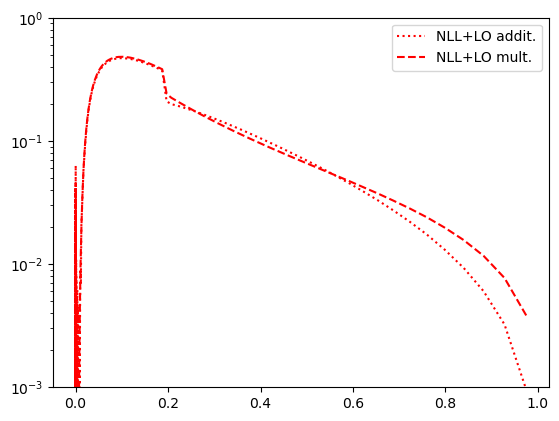

FC3 CENTRAL 40460.3 -505.868 39954.432


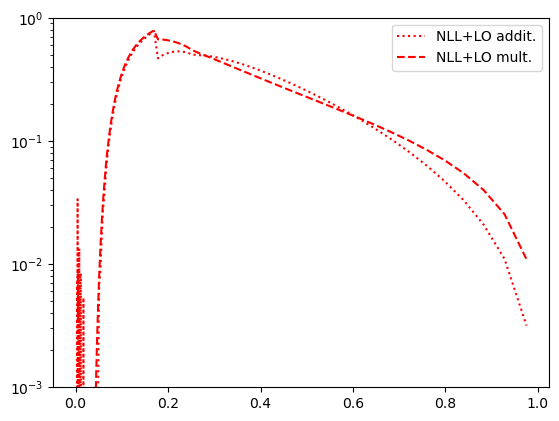

In [94]:
colors = {'CENTRAL': 'red', 'MUR=0.5__MUF=1__LHAPDF=-1': 'blue', 'MUR=2__MUF=1__LHAPDF=-1': 'green'}
print(dist.has_lo)
N=len(dist.aSCpower)
t=np.linspace(-10,0,N)
#plt.plot(t,dist.NLL)
dist=dists['TL']['CENTRAL']

new_NLL1=dist.NLL1.copy()
bools=np.insert(dist.NLL1[1::]<dist.NLL1[:N-1],0,False)
ind=min([  i  for i in range(len(bools)) if bools[i]])
print(ind)
new_NLL1[bools]=new_NLL1[ind]

plt.semilogy(-dist.NLL1,label="Nll1")
plt.semilogy(-dist.FO1,label="FO")
plt.legend()
plt.show()

plt.plot(np.exp(t[1::]),dist.FO1[1::]-dist.FO1[:N-1:])
plt.plot(np.exp(t[1::]),new_NLL1[1::]-new_NLL1[:N-1])
plt.show()


ascpower=1/dist.sigma0*(dist.FO1-new_NLL1)
plt.plot(np.exp(t),ascpower)
plt.plot(np.exp(t),dist.aSCpower)
plt.show()
plt.semilogy(np.exp(t[1::]),dist.NLL[1::]-dist.NLL[:N-1:])
#plt.plot(np.exp(t),dist.aSCpower)
plt.show()
newone=dist.NLL*(1+ascpower)
plt.semilogy(np.exp(t[1::]),20/dist.sigma0*(newone[1::]-newone[:len(dist.aSCpower)-1:]))
for O in dists:
    for var in dists[O]:
        distext = dists[O][var]
        dist = dists[O][var]
        print(O,var,dist.sigma0,dist.sigma1,dist.sigmaLO)
       # plt.plot(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLL'),color=colors[var],ls='solid',label="NLL")
        plt.semilogy(np.exp(dist.BinMids),dist('D','ScaleBy','sigma0','Match',Additive,1),color=colors[var],ls='dotted',label="NLL+LO addit.")
        plt.semilogy(np.exp(dist.BinMids),dist('D','ScaleBy','sigma0','Match',Multiplicative,1),color=colors[var],ls='dashed',label="NLL+LO mult.")
        plt.ylim(10**-3,1)
        plt.legend()
        plt.savefig(f"plots/b={O}_match_to_LO.pdf")
    plt.show()

4.654920264881017e-05 0.975309694404808


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:73: RuntimeWarning: invalid value encountered in log
  (a_l - 2*lamb)*np.log(1-2*lamb/a_l)
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:80: RuntimeWarning: invalid value encountered in log
  self.K/(4*np.pi**2*self.beta_0**2)*((a_l+b_l)*np.log(1 - 2*lamb /(a_l+b_l)) - a_l*np.log(1 - 2*lamb/a_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:82: RuntimeWarning: invalid value encountered in log
  a_l/2 * np.log(1-2*lamb/a_l)**2 - (a_l+b_l) /
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:84: RuntimeWarning: invalid value encountered in log
  + a_l*np.log(1-2*lamb/a_l) - (a_l+b_l)*np.log(1-2*lamb/(a_l+b_l))
/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:41: RuntimeWarning: invalid value encountered in log
  return -1/(np.pi*self.beta_0)*np.log(1-2*lamb)


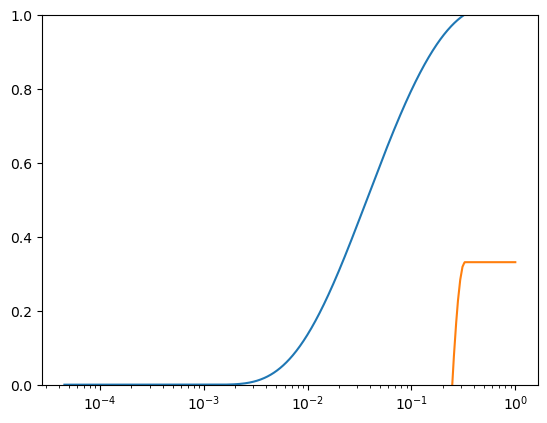

0.35879637888640964


/home/amber.klimke/Documents/Masterarbeit/master/resummation_class.py:688: RuntimeWarning: invalid value encountered in log
  res=0


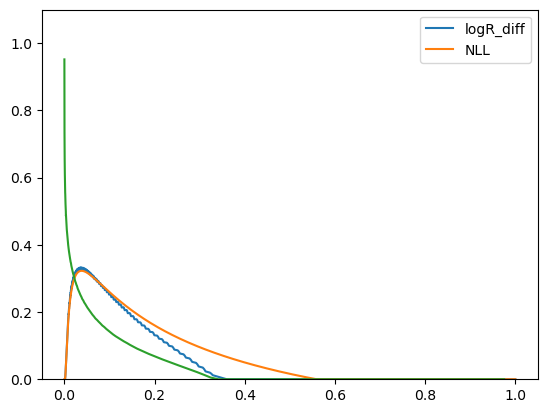

In [95]:
M=1000
v=np.logspace(-10,0,M,base=np.exp(1))
A=my_rs.Resummation([1,1],[1,1],[1,1],[1,1])
A.run(v, diff=False)
plt.semilogx(v,A.resum)

dist = dists["TL"]['CENTRAL']
LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0))
print(min(np.exp(dist.BinMids)),max(np.exp(dist.BinMids)))
plt.semilogx(v,1+LO(v))
plt.ylim(0,1)
plt.show()


endpoint=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])
print(endpoint)


A.logRmatch(v,LO=LO,diff=True,endpoint=endpoint,deltaF=v[1:])
plt.plot(v[1:],A.diff,label="logR_diff")
A.run(v,deltaF=v[1::])
plt.plot(v[1:],A.diff,label="NLL")
plt.plot(np.exp(dist.BinMids),dist('D','ScaleBy','sigma0','LO'))
plt.ylim(0,1.1)
plt.legend()
plt.show()


In [ ]:
M=1000
v=np.logspace(-10,0,M,base=np.exp(1))
A=my_rs.Resummation([1,1],[1,1],[0,0],[1,1])
A.run(v, diff=False)
plt.semilogx(v,A.resum)

dist = dists["FC2"]['CENTRAL']
LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0))
plt.semilogx(v,1+LO(v))
plt.show()


endpoint=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])
print(endpoint)


A.logRmatch(v,LO=LO,diff=True,endpoint=1,deltaF=v[1:])
plt.plot(v[1:],A.diff,label="logR")
A.run(v,diff=True,deltaF=v[1:])
plt.plot(v[1:],A.diff,label="NLL")
plt.plot(np.exp(dist.BinMids),dist('D','ScaleBy','sigma0','LO'))
plt.legend()
plt.show()

In [ ]:
M=10000
v=np.logspace(-10,0,M,base=np.exp(1))
A=my_rs.Resummation([1,1],[1,1],[-0.5,-0.5],[1,1])
A.run(v, diff=False)
plt.semilogx(v,A.resum,label="NLL")

dist = dists["FC3"]['CENTRAL']
LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0) )
plt.semilogx(v[:len(v)-40],1+LO(v[:len(v)-40]),label="LO")
plt.legend()
plt.show()


endpoint=min(     np.exp(dist.BinMids) [ np.insert(dist('ScaleBy','sigma0','LO')[5::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids)-4:],[False for i in range(4)],0) ]     )
print(endpoint)


A.logRmatch(v,LO=LO,diff=True,deltaF=v[1:],endpoint=endpoint)
plt.semilogx(v[1:],A.diff,label="logR")
A.run(v,diff=True,deltaF=v[1:])
plt.semilogx(v[1:],A.diff,label="NLL")
plt.semilogx(np.exp(dist.BinMids),dist('D','ScaleBy','sigma0','LO'))
plt.legend()
plt.show()

In [ ]:
colors = {'CENTRAL': 'red', 'MUR=0.5__MUF=1__LHAPDF=-1': 'blue', 'MUR=2__MUF=1__LHAPDF=-1': 'green'}

print(dist.has_lo)
for O in dists:
    for var in dists[O]:
        distext = dists[O][var]
        dist = dists[O][var]
        print(O,var,dist.sigma0,dist.sigma1,dist.sigmaLO)
        v=np.exp(dist.BinMids)
        endpoint=min(     np.exp(dist.BinMids) [ np.insert(dist('ScaleBy','sigma0','LO')[5::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids)-4:],[False for i in range(4)],0) ]     )
        
        A=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
        LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0) )
        A.logRmatch(v[:len(v)],LO=LO,diff=True,deltaF=v[1:],endpoint=endpoint)
        plt.semilogx(v[1:],A.diff,label="logR")
        plt.semilogx(np.exp(dist.BinMids),dist('ScaleBy','sigma0','D','NLL'),color=colors[var],ls='solid',label="NLL")
        plt.semilogx(np.exp(dist.BinMids),dist('D','Normalise','Match',Additive,1),color=colors[var],ls='dotted',label="NLL+LO addit.")
        plt.semilogx(np.exp(dist.BinMids),dist('D','Normalise','Match',Multiplicative,2),color=colors[var],ls='dashed',label="NLL+LO mult.")
        plt.ylim(10**-6,1.3)
        plt.legend()
        plt.savefig(f"plots/b={O}_match_to_LO.pdf")
    plt.show()

In [ ]:
rivet_data={'FC1': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/heavyHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
            'FC2': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/heavyHemisphere_FC1.dat",sep='\t',header=11,names=["xlow","xhigh","val","errminus","errplus"]),
            'FC3':  pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/heavyHemisphere_FC1.5.dat",sep='\t',header=11,names=["xlow","xhigh","val","errminus","errplus"]),
           'TL':  pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/thrust.dat",sep='\t',header=11,names=["xlow","xhigh","val","errminus","errplus"] ),
                      'TLm':  pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/thrustMinor.dat",sep='\t',header=11,names=["xlow","xhigh","val","errminus","errplus"] )}



In [ ]:
for O in dists:
    N2=len(rivet_data[O].loc[1:])
    test_data=np.array([float(i) for i in rivet_data[O].loc[1:]['val']])
    test_x=np.array([float(i) for i in rivet_data[O].loc[1:N2-1]['xlow']])
    dist=dists[O]['CENTRAL']

    N=len(dist.aSCpower)
    t=np.linspace(-10,0,N)
    #plt.plot(t,dist.NLL)
    
    new_NLL1=dist.NLL1.copy()
    bools=np.insert(dist.NLL1[1::]<dist.NLL1[:N-1],0,False)
    ind=min([  i  for i in range(len(bools)) if bools[i]])
    print(ind)
    new_NLL1[bools]=new_NLL1[ind]


    
    ascpower=1/dist.sigma0*(dist.FO1-new_NLL1)
    newone=dist.NLL*(1+ascpower)
    plt.semilogy(np.exp(t[1::]),20/dist.sigma0*(newone[1::]-newone[:len(dist.aSCpower)-1:]))


    
    plt.semilogy(test_x,test_data[:N2-1], drawstyle='steps',label="Rivet")
    plt.semilogy(np.exp(dist.BinMids),max(test_data)*dist('D','Normalise','Match',Multiplicative,2),color=colors[var],ls='dashed',label="NLL+LO mult.")
  #  plt.semilogy(np.exp(dist.BinMids),max(test_data)*dist('D','Normalise','Match',Additive,2),color=colors[var],ls='dashed',label="NLL+LO add.")
    plt.xlabel(O)
    plt.legend()
    plt.show()

In [ ]:
N2=len(rivet_data[O].loc[1:])
test_data=np.array([float(i) for i in rivet_data['TLm'].loc[1:]['val']])
test_x=np.array([float(i) for i in rivet_data['TLm'].loc[1:N2-1]['xlow']])
dist=dists['TL']['CENTRAL']

N=len(dist.aSCpower)
t=np.linspace(-10,0,N)
    #plt.plot(t,dist.NLL)
    
new_NLL1=dist.NLL1.copy()
bools=np.insert(dist.NLL1[1::]<dist.NLL1[:N-1],0,False)
ind=min([  i  for i in range(len(bools)) if bools[i]])
new_NLL1[bools]=new_NLL1[ind]


    
ascpower=1/dist.sigma0*(dist.FO1-new_NLL1)
newone=dist.NLL*(1+ascpower)
alpha=0.117
plt.semilogy(np.exp(t[1::]),300/dist.sigma0*(newone[1::]-newone[:len(dist.aSCpower)-1:]),label="cutoff")


    
plt.semilogy(test_x,test_data[:N2-1], drawstyle='steps',label="Rivet")
plt.semilogy(np.exp(dist.BinMids),max(test_data)*dist('D','Normalise','Match',Multiplicative,2),color=colors[var],ls='dashed',label="NLL+LO mult.")
# plt.semilogy(np.exp(dist.BinMids),max(test_data)*dist('D','Normalise','Match',Additive,2),color=colors[var],ls='dashed',label="NLL+LO add.")
plt.xlabel(O)
plt.legend()
plt.show()

In [ ]:
rivet_data_comparison={'FC1_max1': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1FragOff/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC1_max2': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2FragOff/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC1_max5': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5FragOff/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC2_max1': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1FragOff/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC2_max2': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2FragOff/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC2_max5': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5FragOff/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC3_max1': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1FragOff/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC3_max2': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2FragOff/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'FC3_max5': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5FragOff/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) ,
                       'TL_max1': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1FragOff/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'TL_max2': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2FragOff/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]) , 
                       'TL_max5': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5FragOff/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_full': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_full': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_full': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_full': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfullFragOff/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_full_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_full_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_full_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_full_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_max1_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_max1_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_max1_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_max1_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_max2_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_merge/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_max2_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_merge/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_max2_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_merge/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_max2_merge': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_merge/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_full_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge_log/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_full_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge_log/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_full_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge_log/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_full_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge_log/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_max1_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_max1_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_max1_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_max1_merge_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_full_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_merge_log/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_max1_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_max1_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_max1_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_max1_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax1_merge_log/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_full_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_log/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_full_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_log/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_full_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSfull_log/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"])  ,
                       'FC3_max2_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_log/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_max2_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_log/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_max2_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_log/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_max2_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax2_log/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC3_max5_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5_log/sumHemisphere_FC1.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC2_max5_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5_log/sumHemisphere_FC1.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'FC1_max5_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5_log/sumHemisphere_FC0.5.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),
                       'TL_max5_log': pnd.read_csv("RivetAnalysis/Plots/HSA_CSSmax5_log/thrust.dat",sep="\t",header=11,names=["xlow","xhigh","val","errminus","errplus"]),

                      
                      
                      
                      }

In [ ]:
print(rivet_data_comparison['FC1_max1_merge'])

In [ ]:
import scipy as sc

def matching_my_resum(dist,mode='M'): 
    cumulative=dist.NLL
    NLL1=dist.NLL1
    ascpower=1/dist.sigma0*(dist('LO')-NLL1)-1
    
    if mode=='M':
        newone=cumulative*(1+ascpower)    

    if mode=='A':
        C1=0
        newone = (1+C1)*dist.NLL + dist.FO1-dist.NLL1-C1*dist.sigma0
        
    result=sc.interpolate.interp1d(np.insert(dist.BinMids,0,0),newone)        
    return result


def matching_Lrescale(dist,mode='M',endpoint=1): 
    N2=len(dist.NLL)
    cumulative=dist.NLL
    NLL1=dist.NLL1
    
    if endpoint==1:
        endpoint=np.exp(dist.BinMids)[dist('LO')[:N2-1]==np.max(dist('LO'))][1]
        
    R=sc.interpolate.interp1d(np.insert(dist.BinMids,N2-1,0),cumulative)         
    v=1/(1/np.exp(dist.BinMids)-1/endpoint+1)
    v[v>=1]=1
    v[v<0]=1
    v=np.log(v)
    expLO=sc.interpolate.interp1d(np.insert(dist.BinMids,N2-1,0),NLL1)
    ascpower=1/dist.sigma0*(dist('LO')[:N2-1]-expLO(v))-1
    if mode=='M':
        newone=R(v)*(1+ascpower)    

    if mode=='A':
        C1=0
        newone = (1+C1)*R(v) + dist.FO1[:N2-1]-expLO(v)-(C1)*dist.sigma0
        
    result=newone
    return result
    
FCs=['1','2','3']
CSSmaxem=['max1','max2','max5','full']
lines={'max5':'solid','max2':'dotted','max1':'dashed','full':'dashed'}

def normalize(arr):
    sum=0
    for i in arr:
        if i>=0:
            sum+=i*1/len(arr)
    return arr/(sum)

    

In [ ]:
k=0
vmax=[]

for O in dists:
    k+=1
    plt.subplot(2,2,k)
    for i in CSSmaxem:

        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}'].loc[1:N2-1]['xlow']])
        vmax.append((test_x[normalize(test_data[:N2-1])<10**-1][0])) 
        plt.plot(test_x,1/10*normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet em={i} ", linestyle=lines[i],alpha=0.9)
        
    dist=dists[O]['CENTRAL']  
#    v_max=(test_x[test_data[:N2-1]==0][0])
    newone=rescale(matching_Lrescale(dist,mode='M',endpoint=1))
    scale=1
    if k>=3:
        scale*=4
   # plt.semilogy(np.exp(dist.BinMids[1::]),(newone[1::]-newone[:len(newone)-1:]),label="my matching")
    plt.plot(np.exp(dist.BinMids[1::]),normalize((newone[1::]-newone[:len(newone)-1:])/np.exp(dist.BinMids[1::]))/(5*scale),label="my matching")
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    plt.xlim(0,0.45)
    if k<=2:
        plt.xticks([])
    plt.ylim(0.000001,1.3)

plt.legend(prop={'size': 4})    
plt.show()


In [ ]:
k=0
vmax=[]

for O in dists:
    k+=1
    plt.subplot(2,2,k)
    for i in CSSmaxem:
        if i=='max5':
            continue
        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_merge'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_merge'].loc[1:N2-1]['xlow']])
        vmax.append((test_x[normalize(test_data[:N2-1])<10**-3][0])) 
        plt.plot(test_x,1/10*normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet {i}", linestyle=lines[i],alpha=0.9)
        
    dist=dists[O]['CENTRAL']  
#    v_max=(test_x[test_data[:N2-1]==0][0])
    newone=rescale(matching_Lrescale(dist,mode='M',endpoint=1))
    scale=1
    if k>=3:
        scale*=4
   # plt.semilogy(np.exp(dist.BinMids[1::]),(newone[1::]-newone[:len(newone)-1:]),label="my matching")
    plt.plot(np.exp(dist.BinMids[1::]),normalize((newone[1::]-newone[:len(newone)-1:])/np.exp(dist.BinMids[1::]))/(5*scale),label="my matching")
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    plt.xlim(0,0.45)
    if k<=2:
        plt.xticks([])
    plt.ylim(0.000001,1.3)

plt.legend(prop={'size': 4})    
plt.show()

In [ ]:


for j in FCs:

    
    for i in CSSmaxem:
        N2=len(rivet_data_comparison[f'FC{j}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'FC{j}_{i}'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'FC{j}_{i}'].loc[1:N2-1]['xlow']])
        
        plt.semilogy(test_x,test_data[:N2-1], drawstyle='steps',label=f"Rivet maxem={i} ", linestyle=lines[i],alpha=0.9)
        
    
        
    plt.xlabel(f"FC{j}")
    plt.ylim(10,10**6)
    plt.legend()    
    plt.show()




for i in CSSmaxem:
    N2=len(rivet_data_comparison[f'TL_{i}'].loc[1:])
    test_data=np.array([float(i) for i in rivet_data_comparison[f'TL_{i}'].loc[1:]['val']])
    test_x=np.array([float(i) for i in rivet_data_comparison[f'TL_{i}'].loc[1:N2-1]['xlow']])
       
   # plt.semilogy(test_x,test_data[:N2-1], drawstyle='steps',label=f"Rivet maxem={i} ", linestyle=lines[i],alpha=0.9)

N2=len(rivet_data_comparison[f'TL_full'].loc[1:])
test_data=np.array([float(i) for i in rivet_data_comparison[f'TL_max5'].loc[1:]['val']])
test_x=np.array([float(i) for i in rivet_data_comparison[f'TL_max5'].loc[1:N2-1]['xlow']])
       
plt.semilogy(test_x,test_data[:N2-1], drawstyle='steps',label=f"Rivet full ", linestyle=lines[i],alpha=0.9)

b=my_rs.Resummation([1,1],[1,1],[1,1],[1,1])
v=np.insert(test_x,0,0)

dist=dists['TL']['CENTRAL']


v=np.linspace(0,1,1000)
v_max=(test_x[test_data[:N2-1]==0][0])
print(v_max)

v_2=v.copy()
v_2=1/(1/v_2-1/(v_max)+1)
v_2[v_2>=1]=1
v_2[v_2<0]=1
newone=matching_my_resum(dist,mode='A')(np.log(v_2[1:]))


plt.semilogy(v[2::],1000/dist.sigma0*(newone[1::]-newone[:len(v[1:])-1:]),label="my matching")
#plt.loglog(v[1::], 39*b.diff,color='r')
plt.xlabel(f"TL")   
plt.xlim(0,v_max+0.2)
plt.xlim(0,0.7)
plt.legend()    
plt.show()



In [ ]:
k=0
scale=1
for O in dists:
    k+=1
    plt.subplot(2,2,k)
    dist=dists[O]['CENTRAL']    
    for i in CSSmaxem:
        if i=="max2" or i=='max5':
            continue

        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_merge_log'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_merge_log'].loc[1:N2-1]['xlow']])
               
        plt.loglog(test_x,1/90*normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet em={i} ", linestyle=lines[i],alpha=0.9)
        

        v=np.linspace(0,1,1000)
        v_max=(test_x[int(N2/2):N2-1][test_data[int(N2/2):N2-1]==0])[0]
        
        v_2=v.copy()
        v_2=1/(1/v-1/(v_max)+1)
        v_2[v_2>=1]=1
        v_2[v_2<0]=1
        v_2[np.isnan(v_2)]=1
        v_2[np.isinf(v_2)]=1
        
    scale=[1,1,1,1][k-1]    
    newone=rescale(matching_Lrescale(dist,mode='M',endpoint=1))
    #newone=rescale(matching_my_resum(dist,mode='M')(np.log(v_2[1:])))
           
    plt.loglog(np.exp(dist.BinMids[1::]),scale*(newone[1::]-newone[:len(newone)-1]),label="my matching")
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    plt.xlim(10**-3,v_max+0.2)
    
    if k<=2:
        plt.xticks([])
    plt.ylim(0.0001,0.05)
    
plt.legend(prop={'size': 4})    
plt.show()


In [ ]:
k=0
for O in dists:
    k+=1
    plt.subplot(2,2,k)
    for i in CSSmaxem:

        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_log'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_log'].loc[1:N2-1]['xlow']])
               
        plt.semilogx(test_x,normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet em={i} ", linestyle=lines[i],alpha=0.9)
        
    dist=dists[O]['CENTRAL']  
    print(O)
    if k==4:
        endpoint= min(     np.exp(dist.BinMids) [ np.insert(dist('ScaleBy','sigma0','LO')[5::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids)-4:],[False for i in range(4)],0) ]     )  
    else:
        endpoint=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])

    
    v=np.logspace(-7,0,1000, base=np.exp(1))
    print(endpoint)
    A=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0) )
    A.logRmatch(v,endpoint=endpoint,deltaF=1,LO=LO)
    scale=[5,12,28,55]
    plt.semilogx(v[1:],1/100*A.diff*scale[k-1],label="my matching")
   # A.run(v, deltaF=v[1:])
   # plt.plot(v[1:],6*A.diff*scale,label="NLL")
    
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    plt.xlim(0,0.4)
    if k<=2:
        plt.xticks([])
    plt.ylim(0.0001,4)
    
plt.legend(prop={'size': 4})    
plt.show()


In [ ]:
k=0
for O in dists:
    k+=1
    plt.subplot(2,2,k)
    for i in CSSmaxem:

        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_log'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_log'].loc[1:N2-1]['xlow']])
               
        plt.plot(test_x,normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet em={i} ", linestyle=lines[i],alpha=0.9)
        
    dist=dists[O]['CENTRAL']  
    print(O)
    if k==4:
        endpoint= min(     np.exp(dist.BinMids) [ np.insert(dist('ScaleBy','sigma0','LO')[5::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids)-4:],[False for i in range(4)],0) ]     )  
    else:
        endpoint=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])

    
    v=np.logspace(-7,0,1000, base=np.exp(1))
    print(endpoint)
    A=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0) )
    A.logRmatch(v,endpoint=endpoint,deltaF=1,LO=LO)
    scale=[5,13,30,50]
    plt.plot(v[1:],1/100*A.diff*scale[k-1],label="my matching")
   # A.run(v, deltaF=v[1:])
   # plt.plot(v[1:],6*A.diff*scale,label="NLL")
    
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    plt.xlim(0,0.4)
    if k<=2:
        plt.xticks([])
    plt.ylim(0.0001,4)
    
plt.legend(prop={'size': 4})    
plt.show()


In [ ]:
k=0
for O in dists:
    k+=1
    plt.subplot(2,2,k)
    for i in CSSmaxem:

        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}'].loc[1:N2-1]['xlow']])
               
        plt.semilogx(test_x,normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet em={i} ", linestyle=lines[i],alpha=0.9)
        
    dist=dists[O]['CENTRAL']  
    print(O)
    if k==4:
        endpoint= min(     np.exp(dist.BinMids) [ np.insert(dist('ScaleBy','sigma0','LO')[5::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids)-4:],[False for i in range(4)],0) ]     )  
    else:
        endpoint=min(np.exp(dist.BinMids)[dist('ScaleBy','sigma0','LO')[1::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids):]])

    
    v=np.logspace(-7,0,1000, base=np.exp(1))
    print(endpoint)
    A=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    LO=A.get_LO( dist('ScaleBy','sigma0','LO')-1,np.insert(np.exp(dist.BinMids),0,0) )
    A.logRmatch(v,endpoint=endpoint,deltaF=1,LO=LO)
    scale=1   
  
    plt.semilogx(v[1:],1/4*A.diff*scale,label="my matching")
   # A.run(v, deltaF=v[1:])
   # plt.plot(v[1:],6*A.diff*scale,label="NLL")
    
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    plt.xlim(0,0.9)
    if k<=2:
        plt.xticks([])
    plt.ylim(0.0001,10)
    
plt.legend(prop={'size': 4})    
plt.show()


In [ ]:
k=0
for O in dists:
    k+=1
    plt.subplot(2,2,k)
    for i in CSSmaxem:
        if i=='max2' or i=='max5':
            continue
        N2=len(rivet_data_comparison[f'{O}_{i}'].loc[1:])
        test_data=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_merge_log'].loc[1:]['val']])
        test_x=np.array([float(i) for i in rivet_data_comparison[f'{O}_{i}_merge_log'].loc[1:N2-1]['xlow']])
               
        plt.loglog(test_x,1/500*normalize(test_data[:N2-1]), drawstyle='steps',label=f"Rivet em={i} ", linestyle=lines[i],alpha=0.9)
        
    dist=dists[O]['CENTRAL'] 

    endpoint=0.3# min(     np.exp(dist.BinMids) [ np.insert(dist('ScaleBy','sigma0','LO')[5::]<=dist('ScaleBy','sigma0','LO')[:len(dist.BinMids)-4:],[False for i in range(4)],0) ]     )    
    v=np.logspace(-7,0,1000, base=np.exp(1))
    print(endpoint)
    A=my_rs.Resummation([1,1],[1,1],[b_values[O],b_values[O]],[1,1])
    LO=A.get_LO(dist())
    A.logRmatch(v,endpoint=endpoint,deltaF=v[1:])
        
        
    plt.loglog(v[1:],A.diff/100,label="my matching")
        #plt.loglog(v[1::], 39*b.diff,color='r')
    plt.xlabel(f"{O}")   
    #plt.xlim(0,endpoint)
    if k<=2:
        plt.xticks([])
    plt.ylim(0.0001,0.035)
    
plt.legend(prop={'size': 4})    
plt.show()


In [ ]:
exprs = {'NLOpNLL': ['D','Normalise','Match',Multiplicative,2],
         'LOpNLL':  ['D','Normalise','Match',Multiplicative,1],
         'NLL':     ['D','Normalise','NLL'],
         'LO':      ['D','Normalise','LO'],
         'NLO':     ['D','Normalise','NLO'],
        }

In [ ]:
outdir = 'YODAS'
if not os.path.exists(outdir): os.mkdir(outdir)
for name,expr in exprs.items():
    yda_out = []
    for O in dists:
        for var in dists[O]:
            distext = dists[O][var]
            path = f'resum/{O}'
            if var != "CENTRAL":
                path += f'[{var}]'
            yda_out += YODAS([distext],[expr],path=path)
    yoda.writeYODA(yda_out,f"{outdir}/{name}.yoda")

In [ ]:
NC = 3
CA = NC
CF = (NC**2-1)/(2*NC)
alphaS = 0.117998
C1 = {'Thrust':            CF*(2*m.pi**2-15)/6,                             # https://inspirehep.net/literature/344540
      'ThrustMajor':       CF*(4*m.log(2)-6*m.log(2)**2 + m.pi**2 - 17/2),  # arXiv:hep-ph/0112156   ^1
      'EParameter':        CF*(4*m.log(2)-6*m.log(2)**2 + m.pi**2 - 17/2),  # arXiv:hep-ph/0112156   ^1
      'CParameter':        CF*(4*m.pi**2-15)/6,                             # arXiv:hep-ph/9801350
      'TotBroad':          CF*(m.pi**2-17/2),                               # https://inspirehep.net/literature/341996                    
      'WideBroad':         CF*(m.pi**2-17/2),                               # https://inspirehep.net/literature/341996 
      'HeavyJetMass':      CF*(2*m.pi**2-15)/6,                             # https://inspirehep.net/literature/344540
      'HeavyMinLightMass': CF*(2*m.pi**2-15)/6,                             # https://inspirehep.net/literature/344540
      'Y3_Durham':         CF*(-6*m.log(2)+m.pi**2/6-5/2),                  # arXiv:hep-ph/0112156
      'Oblateness':        CF*(4*m.log(2)-6*m.log(2)**2 + m.pi**2 - 17/2),  # arXiv:hep-ph/0112156   ^1
     }
# ^1 note different conventions for d_l, leading to additonal factor -2*CF*(d**2+d) w/ d = log(2)

In [ ]:
for O in dists:
    if not O in fullnames: continue
    if not fullnames[O] in C1: continue
    var='CENTRAL'
    dist = dists[O][var]
    c1 = dist.sigma1/dist.sigma0+dist._nll_alphaS/(2*m.pi) * C1[fullnames[O]]
    print(O,var,c1)
    plt.plot(dist.xvals,dist('aSCpower'),label='Sherpa')
    plt.axhline(y=c1,color='k')
    plt.legend()
    plt.show()